# <center> CS 666 - Classification Problem - PIMA Indians Diabetes Dataset</center>

## Business Problem

Client wants to make the best decision on a business problem of classifying the right number of people who have diabetes and who do not have diabetes to invest valuable time towards the proper treatment of diabetic patients rather than in diabetes testing.




--------------------------------------------------------------------------------------------------------

PIMA Indians Diabetes Data Description
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 768 

    :Number of Attributes: 8 numerical medical attributes. Outcome (attribute 9) is usually the target which is classification variable.

    :Attribute Information (in order):
       - Pregnancies: Number of times pregnant
       - Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
       - BloodPressure: Diastolic blood pressure (mm Hg)
       - SkinThickness: Triceps skin fold thickness (mm)
       - Insulin: 2-Hour serum insulin (mu U/ml)
       - BMI: Body mass index (weight in kg/(height in m)^2)
       - DiabetesPedigreeFunction: Diabetes pedigree function 
       - Age: Age (years)
       - Outcome: Class variable (0 or 1)

## Import necessary libraries

In [546]:
# Numeric libraries
import numpy as np
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Disabling the warnings
import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing Lirabries
from sklearn.preprocessing import StandardScaler,normalize

# Importing Predictive models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import ensemble, linear_model, neighbors, svm, tree, linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# Importing Mectrics to calculate performance
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score, accuracy_score, f1_score


## Load a CSV File

In [452]:
pima_dataset = pd.read_csv('diabetes.csv')

## Data Analysis

### Descriptive Statistics

In [389]:
pima_dataset.head(20) # Peek at your raw data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [390]:
pima_dataset.shape #Dimensionality of your data

(768, 9)

In [391]:
pima_dataset.dtypes # Data types of attributes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [392]:
pima_dataset.describe() # Descriptive statistics or properties of each attribute

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [453]:
class_count = pima_dataset.groupby('Outcome').size() #Class Distribution to check class imbalance

In [454]:
class_count

Outcome
0    500
1    268
dtype: int64

In [395]:
correlations = pima_dataset.corr() # Correlations between the attributes

In [396]:
correlations

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


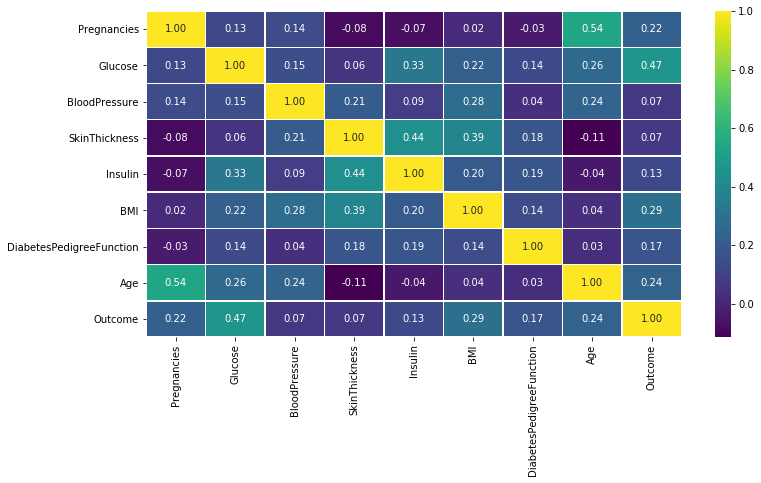

In [599]:
# Visualizing the correlations between various attributes
fig, ax = plt.subplots(figsize=(12,6)) 
sns.heatmap(correlations, annot = True, fmt = ".2f", linewidths=0.5, cmap='viridis', ax=ax) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

- Outcome <--> Glucose
- Age -- Pregnancies

In [400]:
pima_dataset.skew() # To check the skewness of each attribute

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

### Data Visualization

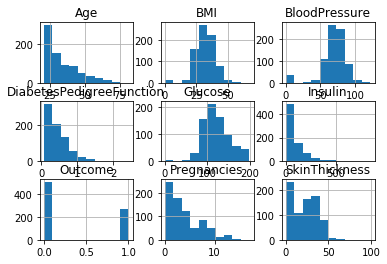

Pregnancies                   206.000
Glucose                     11412.000
BloodPressure                6515.000
SkinThickness                2225.000
Insulin                      8842.000
BMI                          3150.100
DiabetesPedigreeFunction       50.641
Age                          2801.000
Outcome                        19.000
dtype: float64

In [598]:
pima_dataset.hist() #Histograms
plt.show()


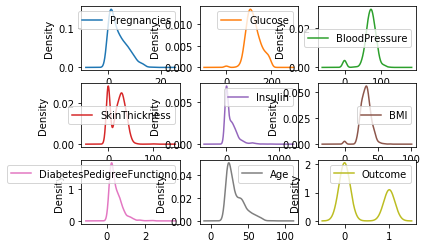

In [402]:
pima_dataset.plot(kind='density', subplots=True, layout=(3,3), sharex= False, legend=True)
plt.show()

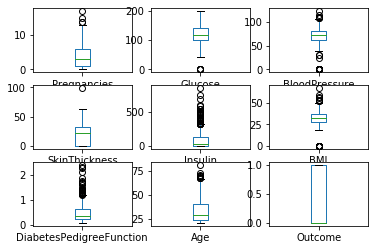

In [403]:
pima_dataset.plot(kind='box', subplots=True, layout=(3,3), sharex= False, legend=False)
plt.show()

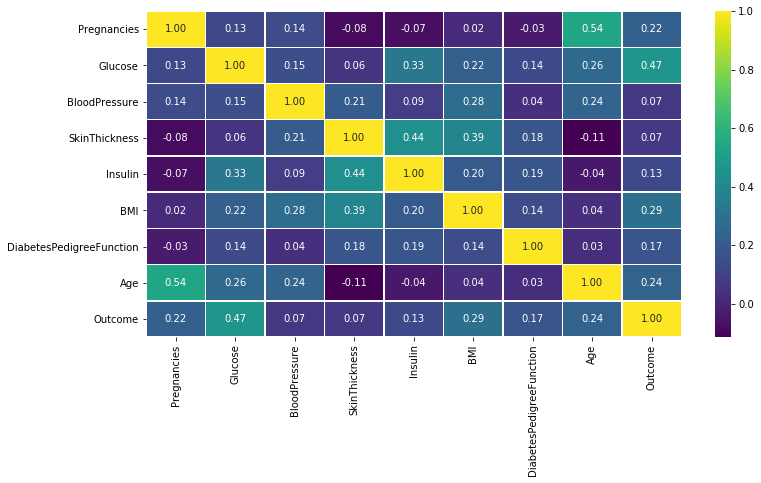

In [404]:
fig, ax = plt.subplots(figsize=(12,6)) 
sns.heatmap(correlations, annot = True, fmt = ".2f", linewidths=0.5, cmap='viridis', ax=ax) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

## Data Preparation

In [455]:
pima_dataset.isnull().sum() #Checking Null Values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

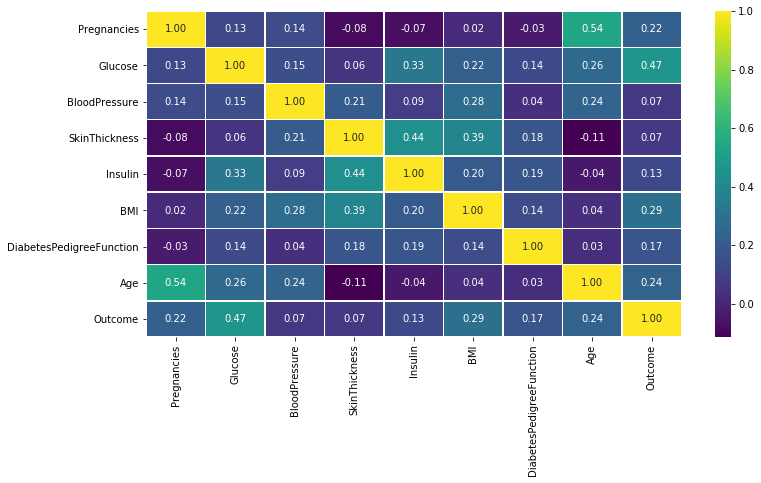

In [456]:
fig, ax = plt.subplots(figsize=(12,6)) 
sns.heatmap(correlations, annot = True, fmt = ".2f", linewidths=0.5, cmap='viridis', ax=ax) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [457]:
# Covert the interger values into float
pima_dataset = pima_dataset.astype({"Pregnancies":'float',"Glucose":'float',"BloodPressure":'float',"SkinThickness":'float',"Insulin":'float',"Age":'float',"Outcome":'float'})

In [458]:
pima_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


**Recursive Feature Elimination**

In [409]:
from sklearn.feature_selection import RFE

In [410]:
lr = LogisticRegression()

In [411]:
rfe = RFE(lr,10)

In [412]:
rfe = rfe.fit(X_res, y_res)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]


NOTE: We have to consider all the features because RFE method gives all True results.

**Remove Outliers from every features who have outliers in it**

In [600]:
from scipy import stats
z = np.abs(stats.zscore(pima_dataset))
print(z)

[[0.63994726 0.84832379 0.14964075 ... 0.46849198 1.4259954  1.36589591]
 [0.84488505 1.12339636 0.16054575 ... 0.36506078 0.19067191 0.73212021]
 [1.23388019 1.94372388 0.26394125 ... 0.60439732 0.10558415 1.36589591]
 ...
 [0.3429808  0.00330087 0.14964075 ... 0.68519336 0.27575966 0.73212021]
 [0.84488505 0.1597866  0.47073225 ... 0.37110101 1.17073215 1.36589591]
 [0.84488505 0.8730192  0.04624525 ... 0.47378505 0.87137393 0.73212021]]


In [460]:
threshold = 3
print(np.where(z > 3))

(array([  4,   7,   8,   9,  13,  15,  45,  49,  49,  58,  60,  60,  75,
        78,  81,  81,  88, 111, 123, 145, 153, 159, 172, 177, 182, 186,
       193, 220, 222, 228, 228, 247, 261, 266, 269, 286, 298, 300, 330,
       332, 336, 342, 347, 349, 357, 370, 370, 371, 371, 395, 409, 415,
       426, 426, 430, 435, 445, 445, 453, 453, 455, 459, 468, 484, 486,
       494, 494, 502, 522, 522, 533, 535, 579, 584, 589, 593, 601, 604,
       619, 621, 643, 645, 655, 666, 673, 684, 684, 695, 697, 703, 706,
       706, 753]), array([6, 2, 4, 5, 4, 2, 6, 2, 5, 6, 2, 5, 1, 2, 2, 5, 0, 4, 7, 5, 4, 0,
       2, 5, 1, 4, 2, 4, 2, 4, 6, 4, 2, 2, 2, 4, 0, 2, 6, 2, 2, 1, 2, 1,
       2, 4, 6, 5, 6, 6, 4, 4, 2, 5, 2, 2, 5, 6, 2, 7, 0, 7, 2, 2, 4, 2,
       5, 1, 2, 5, 2, 2, 3, 4, 2, 6, 2, 2, 2, 6, 2, 4, 4, 7, 5, 5, 7, 4,
       2, 2, 2, 5, 4]))


In [461]:
print(z[58][1])

0.7857295039730422


In [462]:
pima_dataset_wo = pima_dataset[(z < 3).all(axis=1)]

In [463]:
pima_dataset.shape # Shape of dataset before removing outliers

(768, 9)

In [464]:
pima_dataset_wo.shape # Shape of dataset after removing outliers

(688, 9)

**Log Transformation for Skewed input variables**

In [337]:
pima_dataset_wo['Pregnancies'] = np.log(pima_dataset_wo['Pregnancies'])

In [339]:
pima_dataset_wo[['DiabetesPedigreeFunction','Age']] = np.log(pima_dataset_wo[['DiabetesPedigreeFunction','Age']])

In [371]:
pima_dataset_wo[['Pregnancies','DiabetesPedigreeFunction','Age']].isna().sum()

Pregnancies                 0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [419]:
pima_dataset_wo

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


**NOTE: I tried Log Transformation to reduce the skewness of some attributes but I think transformation of attributes are not required in this business problem of identifying diabetic people from non-diabetic people, because values for that particular attributes which are having skewness are relevant and important values to consider while predicting a diabetic person.**

## Evaluate Machine Learning Algorithms
### Train Test Split

In [422]:
from sklearn.model_selection import train_test_split

X = pima_dataset_wo.drop('Outcome',axis=1)

y = pima_dataset_wo['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 101)

### Logistic Regression

In [423]:
from sklearn.linear_model import LogisticRegression

In [430]:
lr = LogisticRegression()

In [431]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [432]:
train_pred_lr = lr.predict(X_train)  # Prediction on Train dataset

In [433]:
test_pred_lr = lr.predict(X_test)  # Prediction on Test dataset

In [434]:
# Predicting on train dataset to check how model is performing while training

print(accuracy_score(y_train,train_pred_lr)) # Accuracy Score for Train dataset
print('\n')
print(confusion_matrix(y_train,train_pred_lr))  # Confusion Matrix for Train dataset
print('\n')
print(classification_report(y_train,train_pred_lr)) # Classification Report for Train dataset

0.7941787941787942


[[299  25]
 [ 74  83]]


              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86       324
         1.0       0.77      0.53      0.63       157

    accuracy                           0.79       481
   macro avg       0.79      0.73      0.74       481
weighted avg       0.79      0.79      0.78       481



In [435]:
### Predicting on test dataset to check trained model performance on new data.....

print(accuracy_score(y_test,test_pred_lr)) # Accuracy Score for Test dataset
print('\n')
print(confusion_matrix(y_test,test_pred_lr))  # Confusion Matrix for Test dataset
print('\n')
print(classification_report(y_test,test_pred_lr)) #Classification Report for Test dataset

0.7632850241545893


[[122  15]
 [ 34  36]]


              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83       137
         1.0       0.71      0.51      0.60        70

    accuracy                           0.76       207
   macro avg       0.74      0.70      0.71       207
weighted avg       0.76      0.76      0.75       207



#### K-Fold Cross Validation

In [436]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [496]:
kfold = KFold(n_splits=10, random_state=101)
result = cross_val_score(lr, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.7834398976982097


#### HyperParameter Tuning Techniques

##### GridSearchCV

In [438]:
from sklearn.model_selection import GridSearchCV

In [439]:
C = [0.5,1.0,1.5,2.0,2.5]
dual=[True,False]
max_iter=[50,100,110,120,130,140]
param_lr = dict(dual=dual,max_iter=max_iter,C=C)

In [447]:
import time

grid = GridSearchCV(estimator=lr, param_grid=param_lr, cv = 10, n_jobs= -1)

start_time = time.time()
grid_result = grid.fit(X, y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.787791 using {'C': 2.0, 'dual': False, 'max_iter': 50}
Execution time: 2.90543794631958 ms


##### RandomizedSearchCV

In [443]:
from sklearn.model_selection import RandomizedSearchCV

In [444]:
random = RandomizedSearchCV(estimator=lr, param_distributions=param_lr, cv = 10, n_jobs= -1)

start_time = time.time()
random_result = random.fit(X, y)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.787791 using {'max_iter': 120, 'dual': False, 'C': 2.0}
Execution time: 5.450348854064941 ms


#### Oversampling Technique - SMOTE Analysis with K-Fold Cross Validation

In [465]:
from imblearn.combine import SMOTETomek

In [596]:
kfold = KFold(n_splits=10, random_state=101)
acc = []
for fold in enumerate (kfold.split(X), 1):
    smk = SMOTETomek(random_state=101)
    X_res, y_res = smk.fit_sample(X,y)

    model = LogisticRegression(C=2.0, max_iter=50)
    model.fit(X_res, y_res)
    prediction_lr = model.predict(X_test)
    acc.append(accuracy_score(y_test,prediction_lr))
acc

[0.7632850241545893,
 0.7632850241545893,
 0.7632850241545893,
 0.7632850241545893,
 0.7632850241545893,
 0.7632850241545893,
 0.7632850241545893,
 0.7632850241545893,
 0.7632850241545893,
 0.7632850241545893]

In [479]:
print(accuracy_score(y_test,prediction_lr)) # Accuracy Score
print('\n')
print(confusion_matrix(y_test, prediction_lr)) #Confusion Matrix 
print('\n')
print(classification_report(y_test,prediction_lr)) #Classification Report 
print('\n')
#print(roc_auc_score(y_test, prediction_lr)) # ROC-AUC score

0.7632850241545893


[[103  34]
 [ 15  55]]


              precision    recall  f1-score   support

         0.0       0.87      0.75      0.81       137
         1.0       0.62      0.79      0.69        70

    accuracy                           0.76       207
   macro avg       0.75      0.77      0.75       207
weighted avg       0.79      0.76      0.77       207





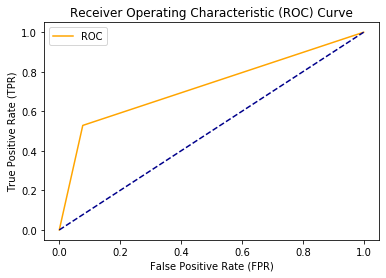



0.7257509632775025


In [487]:
# ROC Curve for Training Dataset

from sklearn.metrics import roc_curve

fp, tp, th = roc_curve(y_train, train_pred_lr)

def plot_roc_curve(fp, tp):
        plt.plot(fp, tp, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()

plot_roc_curve(fp, tp)
print('\n')
print(roc_auc_score(y_train, train_pred_lr)) # ROC-AUC score for Train dataset

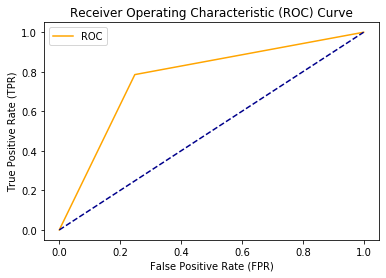



0.7687695516162669


In [488]:
# ROC Curve for Test Dataset

from sklearn.metrics import roc_curve

fp, tp, th = roc_curve(y_test, prediction_lr)

def plot_roc_curve(fp, tp):
        plt.plot(fp, tp, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()

plot_roc_curve(fp, tp)
print('\n')
print(roc_auc_score(y_test, prediction_lr)) # ROC-AUC score for Test dataset

**NOTE: Based on ROC_Curve for both training as well as testing dataset, we can say it's not big  difference between Area Under Curve (AUC) of both datasets, which tells us that our Logistic Regression model is a good generalized model with improved AUC on unseen test dataset and a less chance of overfitting due to use SMOTE Oversampling technique with K-fold Cross Validation.**

### K-Nearest Neighbor Classifier (KNN)

In [489]:
knn = KNeighborsClassifier()

In [490]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [491]:
train_pred_knn = knn.predict(X_train)

In [492]:
test_pred_knn = knn.predict(X_test)

In [493]:
# Predicting on train dataset to check how model is performing while training

print(accuracy_score(y_train,train_pred_knn)) # Accuracy Score for Train dataset
print('\n')
print(confusion_matrix(y_train,train_pred_knn))  # Confusion Matrix for Train dataset
print('\n')
print(classification_report(y_train,train_pred_knn)) # Classification Report for Train dataset

0.8128898128898129


[[289  35]
 [ 55 102]]


              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87       324
         1.0       0.74      0.65      0.69       157

    accuracy                           0.81       481
   macro avg       0.79      0.77      0.78       481
weighted avg       0.81      0.81      0.81       481



In [494]:
### Predicting on test dataset to check trained model performance on new data.....

print(accuracy_score(y_test,test_pred_knn)) # Accuracy Score for Test dataset
print('\n')
print(confusion_matrix(y_test,test_pred_knn))  # Confusion Matrix for Test dataset
print('\n')
print(classification_report(y_test,test_pred_knn)) #Classification Report for Test dataset

0.7198067632850241


[[112  25]
 [ 33  37]]


              precision    recall  f1-score   support

         0.0       0.77      0.82      0.79       137
         1.0       0.60      0.53      0.56        70

    accuracy                           0.72       207
   macro avg       0.68      0.67      0.68       207
weighted avg       0.71      0.72      0.72       207



#### K-Fold Cross Validation

In [495]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [498]:
kfold = KFold(n_splits=10, random_state=101)
result = cross_val_score(knn, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.7165814151747656


#### HyperParameter Tuning Techniques
##### Elbow Method to select best K value

In [499]:
from sklearn.model_selection import GridSearchCV

In [505]:
error_rate = []
# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

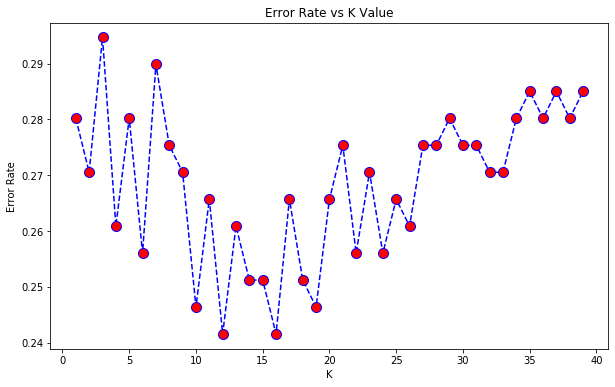

In [506]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

##### Accuracy rate with minimal error rate and effienct value of K

In [536]:
knn = KNeighborsClassifier(n_neighbors=16, weights='distance')
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)

In [537]:
print(accuracy_score(y_test, pred_knn))
print('\n')
print(confusion_matrix(y_test, pred_knn))
print('\n')
print(classification_report(y_test, pred_knn))

0.7584541062801933


[[119  18]
 [ 32  38]]


              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83       137
         1.0       0.68      0.54      0.60        70

    accuracy                           0.76       207
   macro avg       0.73      0.71      0.71       207
weighted avg       0.75      0.76      0.75       207



#### Oversampling Technique - SMOTE Analysis with K-Fold Cross Validation

In [538]:
from imblearn.combine import SMOTETomek

In [583]:
kfold = KFold(n_splits=5, random_state=101)
acc = []
for fold in enumerate (kfold.split(X), 1):
    smk = SMOTETomek(random_state=101)
    X_res, y_res = smk.fit_sample(X,y)

    knn = KNeighborsClassifier(n_neighbors=16, weights='distance')
    knn.fit(X_res, y_res)
    prediction_knn = knn.predict(X_test)
    acc.append(accuracy_score(y_test,prediction_knn))
acc

[0.9710144927536232,
 0.9710144927536232,
 0.9710144927536232,
 0.9710144927536232,
 0.9710144927536232]

In [543]:
print(accuracy_score(y_test,prediction_knn)) # Accuracy Score
print('\n')
print(confusion_matrix(y_test, prediction_knn)) #Confusion Matrix 
print('\n')
print(classification_report(y_test,prediction_knn)) #Classification Report 
print('\n')
#print(roc_auc_score(y_test, prediction_lr)) # ROC-AUC score

0.9710144927536232


[[134   3]
 [  3  67]]


              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       137
         1.0       0.96      0.96      0.96        70

    accuracy                           0.97       207
   macro avg       0.97      0.97      0.97       207
weighted avg       0.97      0.97      0.97       207





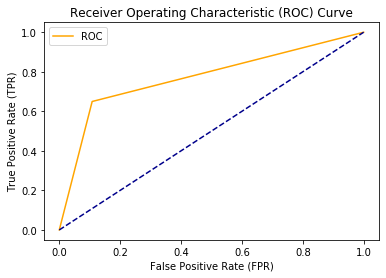



0.7708284186521978


In [544]:
# ROC Curve for Training Dataset

from sklearn.metrics import roc_curve

fp, tp, th = roc_curve(y_train, train_pred_knn)

def plot_roc_curve(fp, tp):
        plt.plot(fp, tp, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()

plot_roc_curve(fp, tp)
print('\n')
print(roc_auc_score(y_train, train_pred_knn)) # ROC-AUC score for Train dataset

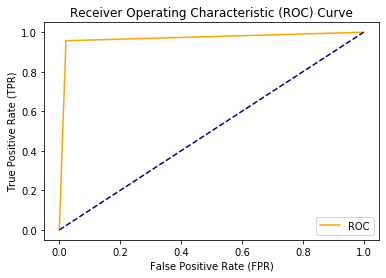



0.9676225234619397


In [545]:
# ROC Curve for Test Dataset

from sklearn.metrics import roc_curve

fp, tp, th = roc_curve(y_test, prediction_knn)

def plot_roc_curve(fp, tp):
        plt.plot(fp, tp, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()

plot_roc_curve(fp, tp)
print('\n')
print(roc_auc_score(y_test, prediction_knn)) # ROC-AUC score for Test dataset

**NOTE: Based on ROC_Curve for both training as well as testing dataset, we can say that our KNN model is a good generalized model with well improved AUC score on unseen test dataset and a less chance of overfitting due to SMOTE analysis with K-fold Cross Validation.**

### Bagging Classifer - Random Forest

In [558]:
seed = 7
num_trees = 100
max_features = 5

In [559]:
kfold = KFold(n_splits=10, random_state=seed)

In [570]:
rf = RandomForestClassifier(n_estimators=num_trees, max_features='auto')
results = cross_val_score(rf, X, y, cv=kfold, scoring='accuracy')
print(results.mean())

0.7704177323103154


In [561]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())''

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 5,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


#### HyperParameter Tuning Techniques
##### GridSearchCV

In [567]:
n_estimators = [200,400,600]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [10,12,30]

# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [568]:
para_grid_rf = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [569]:
import time

grid = GridSearchCV(estimator=rf, param_grid=para_grid_rf, cv = 5, n_jobs= -1)

start_time = time.time()
grid_result = grid.fit(X, y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.789244 using {'bootstrap': True, 'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 400}
Execution time: 654.1096639633179 ms


##### RandomizedSearchCV

In [571]:
from sklearn.model_selection import RandomizedSearchCV

In [572]:
random = RandomizedSearchCV(estimator=rf, param_distributions=para_grid_rf, cv = 5, n_jobs= -1)

start_time = time.time()
random_result = random.fit(X, y)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.790698 using {'n_estimators': 400, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': True}
Execution time: 21.428979873657227 ms


#### Oversampling Technique - SMOTE Analysis with K-Fold Cross Validation

In [579]:
from imblearn.combine import SMOTETomek

In [595]:
kfold = KFold(n_splits=10, random_state=101)
acc = []
for fold in enumerate (kfold.split(X), 1):
    smk = SMOTETomek(random_state=101)
    X_res, y_res = smk.fit_sample(X,y)

    rf = RandomForestClassifier(n_estimators=400,min_samples_split=4,min_samples_leaf=4,
                                max_features='auto',max_depth=30,bootstrap=True)
    rf.fit(X_res, y_res)
    prediction_rf = rf.predict(X_test)
    acc.append(accuracy_score(y_test,prediction_rf))
acc

[0.8985507246376812,
 0.9130434782608695,
 0.893719806763285,
 0.9033816425120773,
 0.9033816425120773,
 0.893719806763285,
 0.893719806763285,
 0.8888888888888888,
 0.8985507246376812,
 0.893719806763285]

## Comparison of accuracy results

In [202]:
from imblearn.combine import SMOTETomek

smk = SMOTETomek(random_state=101)

X_res, y_res = smk.fit_sample(X,y)

X_res.shape,y_res.shape

from collections import Counter

print('Original Dataset Shape {}'.format(Counter(y)))
print('Resampled Dataset Shape {}'.format(Counter(y_res)))

Original Dataset Shape Counter({0.0: 500, 1.0: 268})
Resampled Dataset Shape Counter({1.0: 468, 0.0: 468})


In [589]:
models = []
models.append(('LR', LogisticRegression(C=2.0, max_iter=50))) 
models.append(('KNN', KNeighborsClassifier(n_neighbors=16, weights='distance')))
models.append(('RF', RandomForestClassifier(n_estimators=400,min_samples_split=4,min_samples_leaf=4,
                                max_features='auto',max_depth=30,bootstrap=True)))
models

[('LR',
  LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=50,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='warn', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                       weights='distance')),
 ('RF',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                         max_depth=30, max_features='auto', max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=4, min_samples_split=4,
                         min_weight_fraction_leaf=0.0, n_estimators=400,
                         n_jobs=None, oob_score=False, random_state

In [594]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=101)
    cv_results = cross_val_score(model, X_res, y_res, cv=kfold, scoring='accuracy') 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg) 

LR: 0.743756 (0.058423)
KNN: 0.784717 (0.098410)
RF: 0.819829 (0.073754)


**NOTE: Based on above prodictive modeling, we would recommend to use Random Forest as a final predictive model to best classify the diabetic people from non-diabetic people.**